## Exploring Data Relationships

### 1. [Correlation Matrix and Heatmaps](#corr)

### 2. [Paired Plots](#papl)

### 3. [Category Plots](#catpl)

### 4. [Examine Basic Data Results](#basic)

### 5. [Analysis Questions](#analysis)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Display graphs properly
%matplotlib inline

In [3]:
#Create path to data
path = r"C:\Users\corri\Documents\New Career\Achievment 6\Rabies Project\Data"

In [4]:
#Import cleaned data
df_rabies = pd.read_csv(os.path.join(path, 'Prepared Data', 'Rabies_cases.csv'), index_col = False)

In [5]:
#Check data
df_rabies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       37158 non-null  int64 
 1   Year             37158 non-null  int64 
 2   Semester         37158 non-null  object
 3   Country          37158 non-null  object
 4   Animal Category  37158 non-null  object
 5   Species          37158 non-null  object
 6   Susceptible      37158 non-null  int64 
 7   Cases            37158 non-null  int64 
 8   Killed           37158 non-null  int64 
 9   Slaughtered      37158 non-null  int64 
 10  Deaths           37158 non-null  int64 
 11  Vaccinated       37158 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.4+ MB


In [6]:
# Year column should be an object, not an integer
df_rabies['Year'] = df_rabies['Year'].astype('object')

In [7]:
df_rabies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       37158 non-null  int64 
 1   Year             37158 non-null  object
 2   Semester         37158 non-null  object
 3   Country          37158 non-null  object
 4   Animal Category  37158 non-null  object
 5   Species          37158 non-null  object
 6   Susceptible      37158 non-null  int64 
 7   Cases            37158 non-null  int64 
 8   Killed           37158 non-null  int64 
 9   Slaughtered      37158 non-null  int64 
 10  Deaths           37158 non-null  int64 
 11  Vaccinated       37158 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 3.4+ MB


In [8]:
df_rabies.head(10)

,Unnamed: 0,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated
0,1,2005,Jul-Dec 2005,Algeria,Domestic,Cats,186,19,8,0,12,0
1,2,2005,Jul-Dec 2005,Algeria,Domestic,Cattle,929,125,46,23,56,0
2,3,2005,Jul-Dec 2005,Algeria,Domestic,Dogs,609,190,99,0,110,0
3,4,2005,Jul-Dec 2005,Algeria,Domestic,Equidae,93,47,19,9,20,0
4,5,2005,Jul-Dec 2005,Algeria,Domestic,Goats,634,22,9,6,7,0
5,6,2005,Jul-Dec 2005,Algeria,Domestic,Sheep,7436,24,12,6,6,0
6,7,2005,Jul-Dec 2005,Algeria,Wild,Wildlife (species unspecified),0,1,1,0,0,0
7,9,2005,Jul-Dec 2005,Angola,Domestic,Dogs,412,8,0,0,8,404
8,11,2005,Jul-Dec 2005,Botswana,Domestic,Cattle,111,3,0,0,3,0
9,12,2005,Jul-Dec 2005,Botswana,Domestic,Dogs,18,9,0,0,7,0


In [9]:
# Deleted Unnamed column
df_rabies = df_rabies.drop(columns = ['Unnamed: 0'])

In [10]:
df_rabies.head(10)

,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated
0,2005,Jul-Dec 2005,Algeria,Domestic,Cats,186,19,8,0,12,0
1,2005,Jul-Dec 2005,Algeria,Domestic,Cattle,929,125,46,23,56,0
2,2005,Jul-Dec 2005,Algeria,Domestic,Dogs,609,190,99,0,110,0
3,2005,Jul-Dec 2005,Algeria,Domestic,Equidae,93,47,19,9,20,0
4,2005,Jul-Dec 2005,Algeria,Domestic,Goats,634,22,9,6,7,0
5,2005,Jul-Dec 2005,Algeria,Domestic,Sheep,7436,24,12,6,6,0
6,2005,Jul-Dec 2005,Algeria,Wild,Wildlife (species unspecified),0,1,1,0,0,0
7,2005,Jul-Dec 2005,Angola,Domestic,Dogs,412,8,0,0,8,404
8,2005,Jul-Dec 2005,Botswana,Domestic,Cattle,111,3,0,0,3,0
9,2005,Jul-Dec 2005,Botswana,Domestic,Dogs,18,9,0,0,7,0


## Correlation Matrix and Heatmaps
<a id='corr'></a>

In [11]:
# Create correlation matrix
df_rabies.corr()

,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated
Susceptible,1.000000,0.108263,0.021444,0.000262,0.120460,0.073003
Cases,0.108263,1.000000,0.022112,0.046504,0.921157,0.061702
Killed,0.021444,0.022112,1.000000,0.002366,0.008631,0.002969
Slaughtered,0.000262,0.046504,0.002366,1.000000,0.004138,-0.000061
Deaths,0.120460,0.921157,0.008631,0.004138,1.000000,0.068175
Vaccinated,0.073003,0.061702,0.002969,-0.000061,0.068175,1.000000


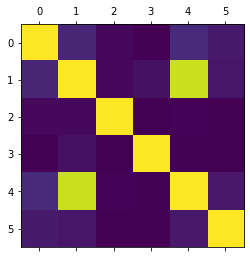

In [12]:
plt.matshow(df_rabies.corr())
plt.show()

Text(0.5, 1.0, 'Rabies Cases Correlation Heatmap')

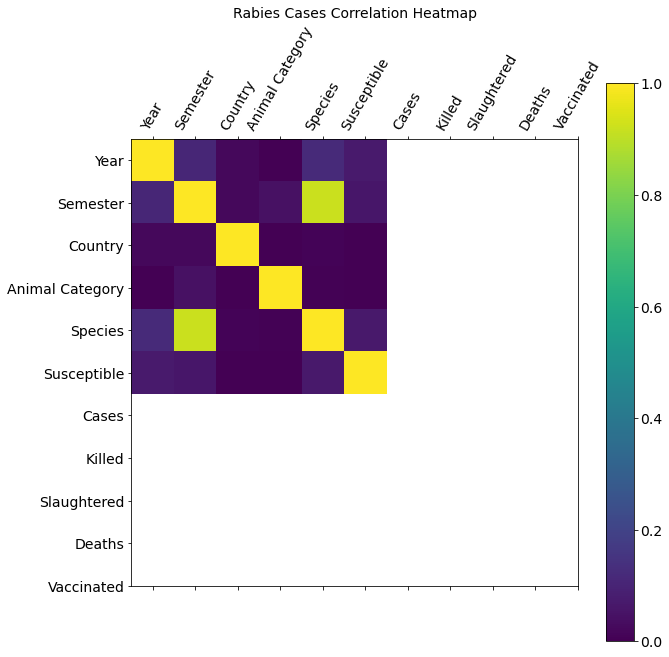

In [13]:
#Create correlation heatmap with labels, legend, and sizing
f = plt.figure(figsize = (10,10))
plt.matshow(df_rabies.corr(), fignum = f.number)
plt.xticks(range(df_rabies.shape[1]), df_rabies.columns, fontsize = 14, rotation = 60)
plt.yticks(range(df_rabies.shape[1]), df_rabies.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title ('Rabies Cases Correlation Heatmap', fontsize = 14)

### The correlation matrix only calculated integer columns and plotted the same.  There is a strong positive correlation between cases and deaths.  Rabies is fatal so all cases should have died which would have resulted in a correlation of 1.0.  At 0.92 it indicates the reporting is likely not 100% accurate.
### I do not understand why the second correlation heatmap is only showing the objects columns and not the integer columns.  I was unable to find any solutions online.  Also, the colorbar is showing 0 to 1 instead of -1 to 1.  It does show a positive correlation between Semester and Species.

In [14]:
# Correlation heatmap with seaborn using a subset of data
sub = df_rabies[['Susceptible', 'Cases', 'Killed', 'Slaughtered', 'Deaths', 'Vaccinated']]

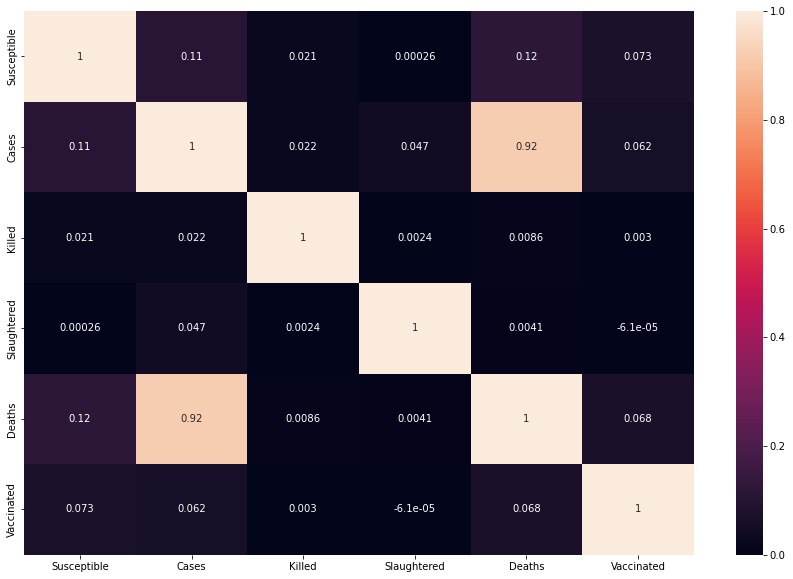

In [15]:
f, ax = plt.subplots(figsize = (15,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

### The seaborn version is showing the same information as the matplotlib version.

In [16]:
#Export correlation heatmap
corr.figure.savefig(os.path.join(path, 'Visualizations', 'corrheatmap.png'))

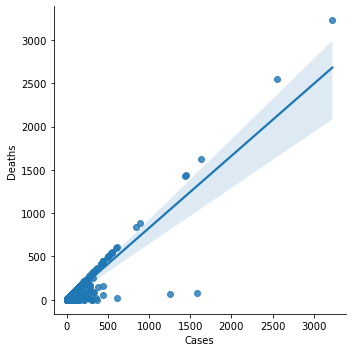

In [17]:
# Scatterplot
sns.lmplot(x = 'Cases', y = 'Deaths', data = df_rabies)

### As indicated in the correlation heatmaps as cases increase generally so do deaths.  Theoretically it should be a straight line but I suspect due to reporting issues it isn't exact.

## Paired Plots
<a id='papl'></a>

In [18]:
#Pair Plots with some variables
sub_2 = df_rabies[['Susceptible', 'Cases', 'Killed','Deaths']]

KeyboardInterrupt: 

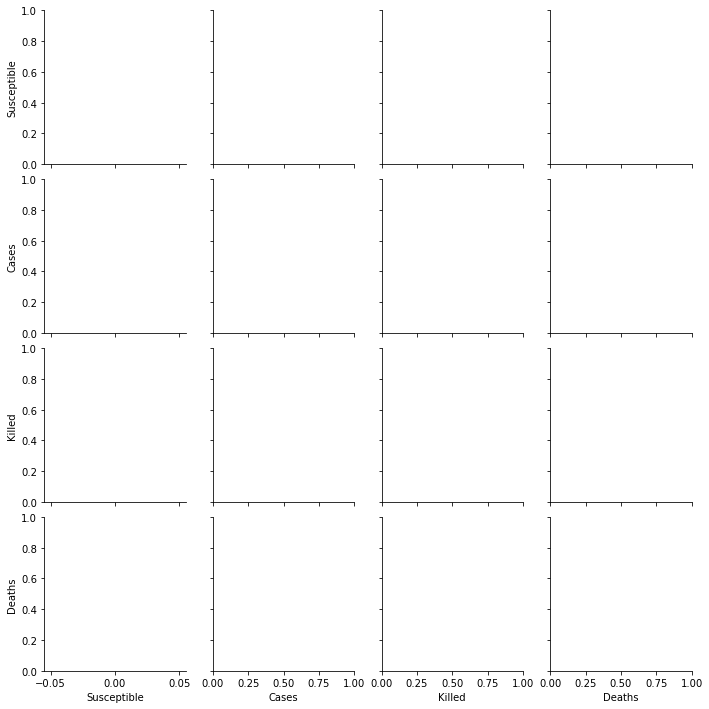

In [19]:
g = sns.pairplot(sub_2)

In [18]:
# Taking far too long to make a pairplot with the data, retry with a sample of data
sns.pairplot(sub_2.sample(1000))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000255248910D0> (for post_execute):


KeyboardInterrupt: 

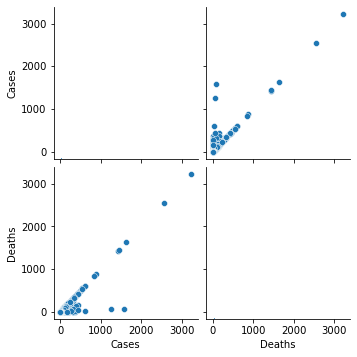

In [19]:
# Still taking too long with a sample,  try with just 2 columns
sns.pairplot(df_rabies, vars = ['Cases', 'Deaths'])

### There seems to be too much data to create paired plots for every column.  Choosing the two with the highest correlation produced the above results.

## Category Plots
<a id='catpl'></a>

<AxesSubplot:xlabel='Cases', ylabel='Count'>

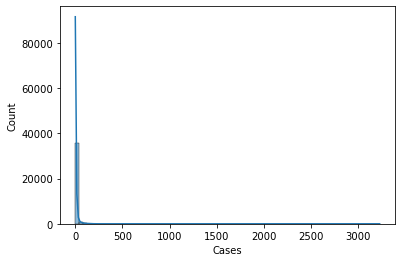

In [19]:
# Categorical plot starting with a histogram
sns.histplot(df_rabies['Cases'], bins = 80, kde = True)

### The majority of cases are clearly at the low end so this histogram doesn't spread them out enough.  I'll check the max and mean, then create a dataframe excluding the higher outliers.

In [20]:
df_rabies.groupby('Animal Category').agg({'Cases':['min', 'max', 'mean', 'median']})

Cases                       
                  min   max      mean median
Animal Category                             
Domestic            0  3226  8.096256    2.0
Wild                0  1441  9.297314    2.0

In [21]:
df_rabies.loc[df_rabies['Cases'] < 5, 'Case Range'] = 'Few'

In [22]:
df_rabies.loc[(df_rabies['Cases'] >= 5) & (df_rabies['Cases'] < 20), 'Case Range'] = 'Some'

In [23]:
df_rabies.loc[df_rabies['Cases'] >= 20, 'Case Range'] = 'Many'

In [24]:
df_rabies['Case Range'].value_counts(dropna = False)

Few     24951
Some     9026
Many     3181
Name: Case Range, dtype: int64

In [25]:
# Dataframe with just the lower number of cases.
df_rabies2 = df_rabies.loc[df_rabies['Cases'] < 100]

In [26]:
df_rabies2.head()

,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Case Range
0,2005,Jul-Dec 2005,Algeria,Domestic,Cats,186,19,8,0,12,0,Some
3,2005,Jul-Dec 2005,Algeria,Domestic,Equidae,93,47,19,9,20,0,Many
4,2005,Jul-Dec 2005,Algeria,Domestic,Goats,634,22,9,6,7,0,Many
5,2005,Jul-Dec 2005,Algeria,Domestic,Sheep,7436,24,12,6,6,0,Many
6,2005,Jul-Dec 2005,Algeria,Wild,Wildlife (species unspecified),0,1,1,0,0,0,Few


In [27]:
df_rabies2.shape

(36802, 12)

<AxesSubplot:xlabel='Cases', ylabel='Count'>

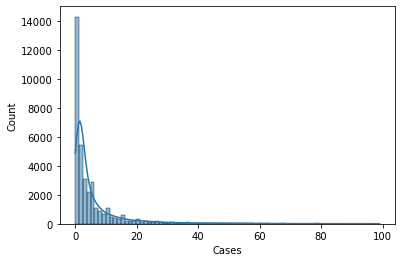

In [28]:
# Repeat the histogram with the subset of data
sns.histplot(df_rabies2['Cases'], bins = 80, kde = True)

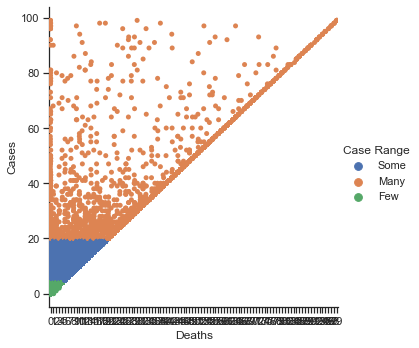

In [37]:
# Create a category plot with the Case Range colors
sns.set(style = 'ticks')
g = sns.catplot(x = 'Deaths', y = 'Cases', hue = 'Case Range', data = df_rabies2)

### Clearly the more cases the more deaths, but this graph also confirms that not all cases were reported as deaths.  The diagonal line is because you cannot have more deaths than cases (as the deaths recorded were only due to rabies).

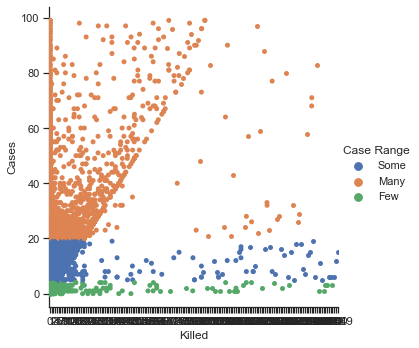

In [52]:
sns.set(style = 'ticks')
cases_killed = sns.catplot(x = 'Killed', y = 'Cases', hue = 'Case Range', data = df_rabies2)

###  The correlation matrix indicated no real correlation between cases and killed animals.  This chart confirms, as rabies cases increased that did not equal an increase in the number of animals that were killed.

## Examine Basic Data Results
<a id='basic'></a>

In [29]:
#Check cases by animal category
pie = df_rabies.groupby('Animal Category').agg({'Cases':['sum']})

array([<AxesSubplot:>], dtype=object)

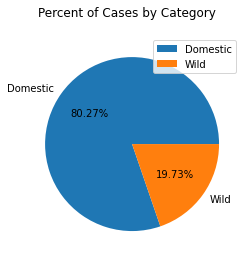

In [30]:
pie.plot(kind ='pie', title = 'Percent of Cases by Category', ylabel = '', autopct = '%.2f%%', subplots = True)

### Understandably most reported cases are coming from domestic animals.  Not all wildlife will be tested.  As domestic animals are in contact with humans (risking spread) it is important to know if they have rabies.

<AxesSubplot:title={'center':'Rabies Cases per Year'}, xlabel='Year', ylabel='Number of Cases'>

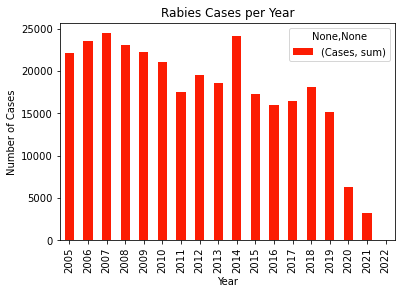

In [31]:
#Count cases per year
df_rabies.groupby('Year').agg({'Cases':['sum']}).plot(kind = 'bar', title = 'Rabies Cases per Year', xlabel = 'Year', ylabel = 'Number of Cases', color = '#fc1c03')

In [32]:
# Species infected each year
pd.set_option('display.max_rows', 800)
df_rabies.groupby(['Species','Year']).count().head(800)

Semester  Country  Animal Category  \
Species                         Year                                       
-                               2019        30       30               30   
                                2020       386      386              386   
                                2021       189      189              189   
Aardwolf                        2012         1        1                1   
                                2013         1        1                1   
                                2014         2        2                2   
                                2015         3        3                3   
                                2016         3        3                3   
                                2017         2        2                2   
                                2018         2        2                2   
                                2019         5        5                5   
                                2020         2        2                2   
                                2021         3        3                3   
African Civet                   2012         1        1                1   
                                2014         1        1                1   
African wild cat                2012         1        1                1   
                                2017         1        1                1   
                                2018         1        1                1   
                                2019         1        1                1   
African wild dog                2012         1        1                1   
                                2013         1        1                1   
                                2015         1        1                1   
American Mink                   2009         9        9                9   
                                2010         7        7                7   
                                2011         3        3                3   
                                2012         7        7                7   
American bison (bison)          2015         1        1                1   
Arctic Fox                      2012         6        6                6   
                                2013         4        4                4   
                                2014         6        6                6   
                                2015         6        6                6   
                                2016         3        3                3   
                                2017         6        6                6   
                                2018         4        4                4   
                                2020         2        2                2   
                                2021         1        1                1   
Argentine brown bat             2013         1        1                1   
Asian House Shrew               2013         1        1                1   
Asian badger                    2012         1        1                1   
                                2015         3        3                3   
                                2016         2        2                2   
                                2018         1        1                1   
Asiatic wild dog                2012         1        1                1   
Banded mongoose                 2013         3        3                3   
Bat-eared Fox                   2012         4        4                4   
                                2013         3        3                3   
                                2014         3        3                3   
                                2015         5        5                5   
                                2016         6        6                6   
                                2017         9        9                9   
                                2018         3        3                3   
          

## Analysis Questions
<a id='analysis'></a>

### My original questions: 
### 1. Are rabies cases increasing or decreasing yearly?  There appears to be an overall downward trend.  2020 and 2021 had the fewest cases by far.  Is this because of actual fewer cases, decreased reporting, less testing due to Covid-19?
### 2. Is rabies cyclical?  I will need to do a time series to have a better understanding of this.
### 3. Are rabies free countries still rabies free?  I will need to do a geographic mapping to answer this.
### 4. Are the same species getting infected each year?  No, but cattle, dogs, cats and horses appear to have the highest counts each year - likely because they are the most common domestic animals in contact with the most people.
### 5. As susceptible numbers change do cases change?  There does not appear to be any correlation between these two variables.